# Results interpretation

## Brief overview

## Imports & global variables

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [46]:
# Read all results from CSV files
model_results = dict(
    model_A=pd.read_csv('../results/results_Model_bootstrapped_A.csv'),
    model_B=pd.read_csv('../results/results_Model_bootstrapped_B.csv'),
    model_C=pd.read_csv('../results/results_Model_bootstrapped_C.csv'),
    model_D=pd.read_csv('../results/results_Model_bootstrapped_D.csv'),
    model_E=pd.read_csv('../results/results_Model_bootstrapped_E.csv'),
    model_F=pd.read_csv('../results/results_Model_bootstrapped_F.csv'),
    model_G=pd.read_csv('../results/results_Model_bootstrapped_G.csv'),
    model_H=pd.read_csv('../results/results_Model_bootstrapped_H.csv'),
    model_I=pd.read_csv('../results/results_Model_bootstrapped_I.csv'),
    model_J=pd.read_csv('../results/results_Model_bootstrapped_J.csv'),
    model_K=pd.read_csv('../results/results_Model_bootstrapped_K.csv')
)

# Set seaborn theme and color palette
sns.set_theme(style="whitegrid", palette="pastel")

## Data processing

In [57]:
best_results = list()
all_results_df = pd.DataFrame()
for model in model_results.keys():
    # Samples for last epoch
    samples = model_results[model][model_results[model]['Epoch'] == 50]
    sd_values = samples.std(ddof=1).to_dict()
    # Get best results for model
    best_result = samples.median().to_dict()
    best_result['Model'] = model
    best_result['HitRate@k [SD]'] = sd_values['HitRate@k']
    best_result['MRR@k [SD]'] = sd_values['MRR@k']
    best_results.append(best_result)
    
    # Concatenate to all results
    model_results_df = model_results[model].copy()
    model_results_df['Model'] = [model] * len(model_results_df)
    all_results_df = pd.concat([all_results_df, model_results_df])

# Transform to data frame
best_results_df = pd.DataFrame(best_results)
all_results_df

,Epoch,Train Loss,Test Loss,Precision@k,Recall@k,MAP@k,MRR@k,NDCG@k,HitRate@k,Bootstrap ID,Model
0,1,0.692995,0.693129,0.007073,0.032680,0.012034,0.019530,0.019548,0.056623,0,model_A
1,2,0.692858,0.693108,0.018268,0.068595,0.026939,0.046571,0.043637,0.123457,0,model_A
2,3,0.692647,0.693076,0.023522,0.083927,0.035807,0.061310,0.056028,0.149912,0,model_A
3,4,0.692353,0.693032,0.025128,0.089311,0.038857,0.066002,0.060100,0.158080,0,model_A
4,5,0.691967,0.692976,0.025573,0.090568,0.039900,0.067712,0.061364,0.161144,0,model_A
...,...,...,...,...,...,...,...,...,...,...,...
495,46,0.001767,0.096322,0.064694,0.206147,0.101353,0.155373,0.146383,0.332305,9,model_K
496,47,0.001605,0.096330,0.064759,0.206555,0.101170,0.155677,0.146383,0.332959,9,model_K
497,48,0.001703,0.096342,0.064890,0.206474,0.100922,0.155046,0.146123,0.332866,9,model_K
498,49,0.001480,0.096357,0.064937,0.206821,0.101264,0.155883,0.146532,0.333240,9,model_K


In [28]:
best_results_df

,Epoch,Train Loss,Test Loss,Precision@k,Recall@k,MAP@k,MRR@k,NDCG@k,HitRate@k,Bootstrap ID,Model,HitRate@k [SD],MRR@k [SD]
0,50.0,0.506552,0.665594,0.022783,0.081604,0.036272,0.065917,0.056344,0.149605,4.5,model_A,0.001354,0.001063
1,50.0,0.001634,0.234972,0.041077,0.119138,0.053667,0.097607,0.085096,0.229329,4.5,model_B,0.006835,0.003802
2,50.0,0.002273,0.096239,0.065047,0.210896,0.112269,0.175856,0.158073,0.345318,4.5,model_C,0.005013,0.004540
3,50.0,0.001394,0.253993,0.051272,0.151038,0.070127,0.122355,0.108028,0.274764,4.5,model_D,0.007052,0.004106
4,50.0,0.383100,0.425984,0.058537,0.182595,0.096353,0.154464,0.136970,0.306608,4.5,model_E,0.004887,0.003216
5,50.0,0.366871,0.497991,0.045820,0.134738,0.064114,0.114087,0.098128,0.250921,4.5,model_F,0.002938,0.001335
6,50.0,0.005657,3.542687,0.008474,0.025266,0.008915,0.020390,0.016263,0.060259,4.5,model_G,0.003089,0.001143
7,50.0,0.005982,3.956929,0.008323,0.025294,0.008693,0.020011,0.016262,0.060403,4.5,model_H,0.003863,0.001434
8,50.0,0.002858,0.087834,0.069466,0.225037,0.121894,0.188660,0.169354,0.361225,4.5,model_I,0.006600,0.003917
9,50.0,0.001704,0.100388,0.060630,0.191515,0.089691,0.143464,0.133451,0.319434,4.5,model_J,0.005190,0.004631


## Model performance table

In [58]:
best_results_df['Epoch'] = best_results_df['Epoch'].astype(int)
best_results_df['Train Loss'] = best_results_df['Train Loss'].round(3)
best_results_df['Test Loss'] = best_results_df['Test Loss'].round(3)
best_results_df['Precision@k'] = 100 * best_results_df['Precision@k'].round(3)
best_results_df['Recall@k'] = 100 * best_results_df['Recall@k'].round(3)
best_results_df['MAP@k'] = 100 * best_results_df['MAP@k'].round(3)
best_results_df['MRR@k'] = 100 * best_results_df['MRR@k'].round(3)
best_results_df['NDCG@k'] = 100 * best_results_df['NDCG@k'].round(3)
best_results_df['HitRate@k'] = 100 * best_results_df['HitRate@k'].round(3)
best_results_df['HitRate@k [SD]'] = 100 * best_results_df['HitRate@k [SD]'].round(3)
best_results_df['MRR@k [SD]'] = 100 * best_results_df['MRR@k [SD]'].round(3)
best_results_df[['Model', 'MRR@k', 'MRR@k [SD]', 'HitRate@k', 'HitRate@k [SD]']]

,Model,MRR@k,MRR@k [SD],HitRate@k,HitRate@k [SD]
0,model_A,6.6,0.1,15.0,0.1
1,model_B,9.8,0.4,22.9,0.7
2,model_C,17.6,0.5,34.5,0.5
3,model_D,12.2,0.4,27.5,0.7
4,model_E,15.4,0.3,30.7,0.5
5,model_F,11.4,0.1,25.1,0.3
6,model_G,2.0,0.1,6.0,0.3
7,model_H,2.0,0.1,6.0,0.4
8,model_I,18.9,0.4,36.1,0.7
9,model_J,14.3,0.5,31.9,0.5


## Loss curve

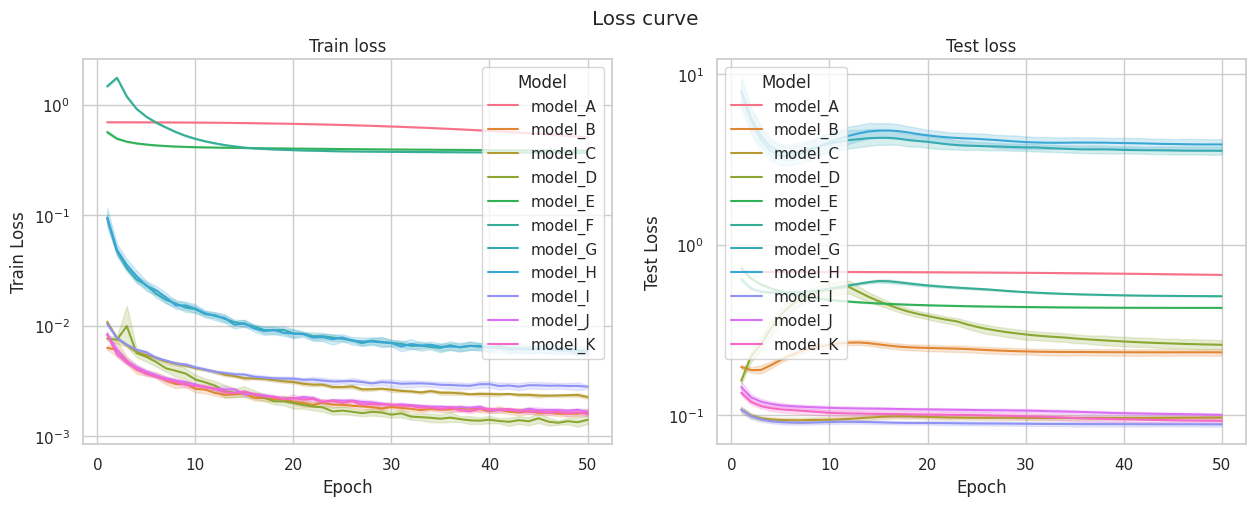

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Generate loss curve
hue_order = all_results_df['Model'].unique()

# Train loss
sns.lineplot(data=all_results_df, 
              x='Epoch',
              y='Train Loss',
              hue='Model',
              hue_order=hue_order,
              ax=axs[0])
axs[0].set_title("Train loss")
axs[0].set_yscale('log')

# Test loss
sns.lineplot(data=all_results_df, 
              x='Epoch',
              y='Test Loss',
              hue='Model',
              hue_order=hue_order,
              ax=axs[1])
axs[1].set_title("Test loss")
axs[1].set_yscale('log')
plt.suptitle('Loss curve')
plt.savefig('../results/figures/ablation_loss_curve.png')
plt.show()

## Model evaluation metrics

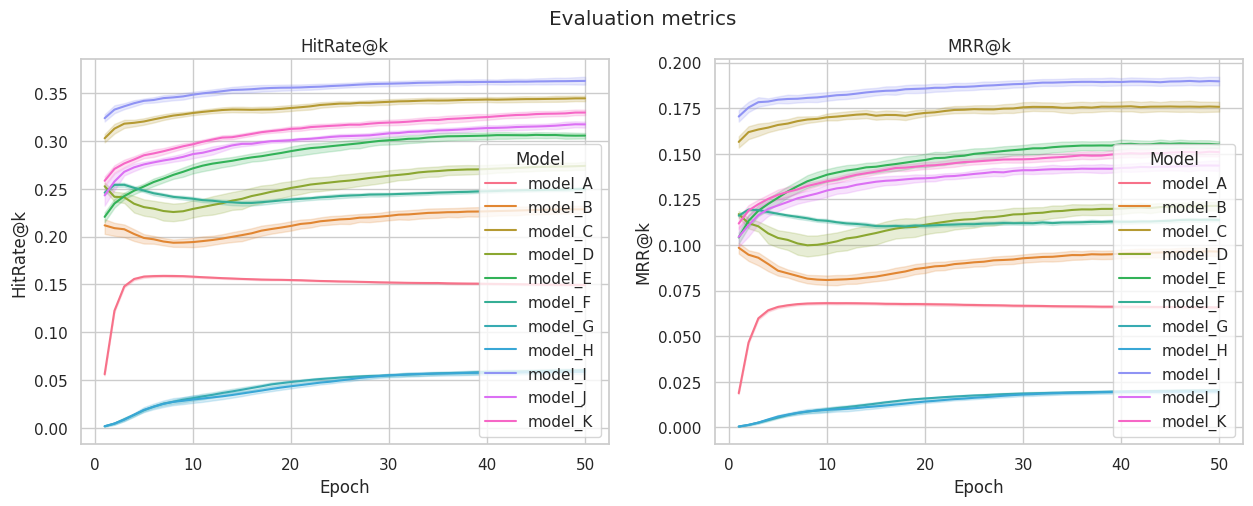

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Generate loss curve
hue_order = all_results_df['Model'].unique()

# HitRate@k
sns.lineplot(data=all_results_df, 
              x='Epoch',
              y='HitRate@k',
              hue='Model',
              hue_order=hue_order,
              ax=axs[0])
axs[0].set_title("HitRate@k")
# axs[0].set_yscale('log')

# MRR@k
sns.lineplot(data=all_results_df, 
              x='Epoch',
              y='MRR@k',
              hue='Model',
              hue_order=hue_order,
              ax=axs[1])
axs[1].set_title("MRR@k")
# axs[1].set_yscale('log')
plt.savefig('../results/figures/ablation_performance.png')
plt.suptitle('Evaluation metrics')
plt.show()

## Top model visualization

In [31]:
top_model = 'I'
top_model_results_df = all_results_df[all_results_df['Model'] == f'model_{top_model}'].copy()
top_model_results_df['Train'] = top_model_results_df['Train Loss']
top_model_results_df['Test'] = top_model_results_df['Test Loss']

top_model_loss_df  = top_model_results_df.melt(id_vars=['Epoch'], 
                                                   value_vars=['Train Loss', 'Test Loss'],
                                                   var_name='Loss', 
                                                   value_name='Loss value')
top_model_performance_df  = top_model_results_df.melt(id_vars=['Epoch'], 
                                                   value_vars=['Precision@k', 'Recall@k', 'MAP@k', 'MRR@k', 'NDCG@k', 'HitRate@k'],
                                                   var_name='Performance metric', 
                                                   value_name='Performance value')


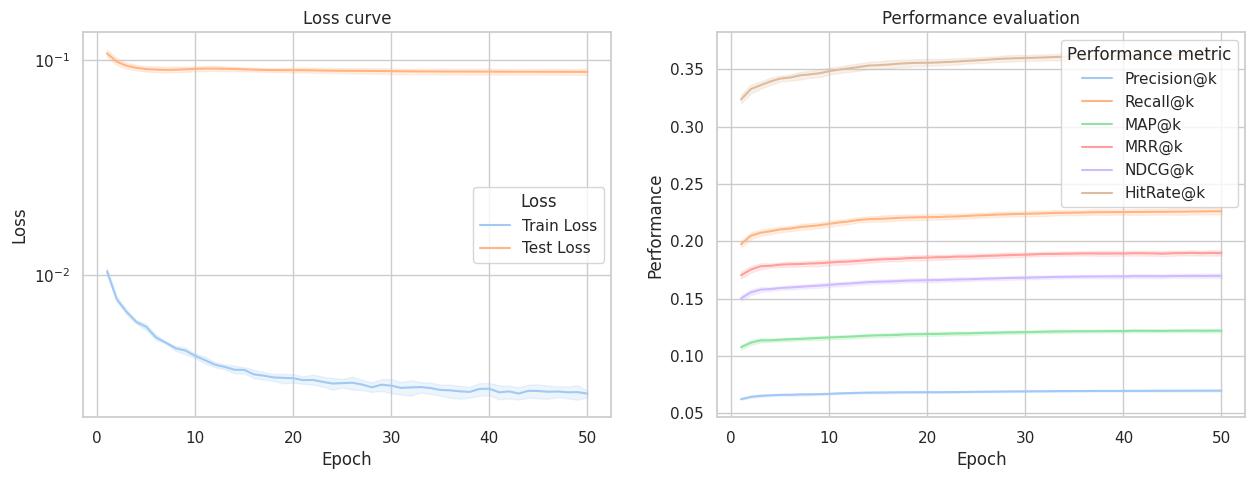

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Loss plot
sns.lineplot(data=top_model_loss_df, 
             x='Epoch', 
             y='Loss value', 
             hue='Loss', 
            ax=axs[0])
axs[0].set_title("Loss curve")
axs[0].set_yscale('log')
axs[0].set_ylabel('Loss')

# Loss plot
sns.lineplot(data=top_model_performance_df, 
             x='Epoch', 
             y='Performance value', 
             hue='Performance metric', 
            ax=axs[1])
axs[1].set_title("Performance evaluation")
axs[1].set_ylabel('Performance')
plt.savefig('../results/figures/ablation_top_performer.png')
plt.show()